# Bank Churn Prediction
This notebook uses PyCaret to train classification models predicting customer churn.

# Bank churn prediction using AutoML (PyCaret)

In [2]:
import pandas as pd

AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)

In [ ]:
#! pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.utils import version
version()

'2.3.10'

## 1. Import the data

In [ ]:
data = pd.read_csv('bank_churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2. Drop unneeded Features


In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3. Import all from PyCaret,(import all the classification models)

In [ ]:
from pycaret.classification import *
s = setup(data = data, target='Exited', train_size=0.8 )



,Description,Value
0,session_id,8672
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 11)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Exited',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

## 3. Model comparison

In [ ]:
s = setup(data = data, target='Exited')
cm = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8614,0.8654,0.4594,0.7694,0.5750,0.4985,0.5223,1.096
rf,Random Forest Classifier,0.8598,0.8467,0.4629,0.7578,0.5742,0.4962,0.5181,0.620
lightgbm,Light Gradient Boosting Machine,0.8578,0.8570,0.4909,0.7255,0.5849,0.5030,0.5174,0.191
ada,Ada Boost Classifier,0.8494,0.8434,0.4615,0.6999,0.5558,0.4697,0.4848,0.217
et,Extra Trees Classifier,0.8428,0.8284,0.4413,0.6784,0.5342,0.4448,0.4599,0.558
lda,Linear Discriminant Analysis,0.8357,0.8287,0.3538,0.6936,0.4682,0.3829,0.4135,0.031
ridge,Ridge Classifier,0.8317,0.0000,0.2587,0.7606,0.3854,0.3144,0.3764,0.015
svm,SVM - Linear Kernel,0.7957,0.0000,0.0014,0.0500,0.0027,0.0016,0.0056,0.155
qda,Quadratic Discriminant Analysis,0.7957,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.044
dummy,Dummy Classifier,0.7957,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.017


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5720, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


## 4. Build the model with the best model

In [ ]:
model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8600,0.8660,0.4336,0.7848,0.5586,0.4835,0.5136
1,0.8657,0.8789,0.4755,0.7816,0.5913,0.5166,0.5394
2,0.8629,0.8895,0.4615,0.7765,0.5789,0.5033,0.5276
3,0.8600,0.8603,0.4476,0.7711,0.5664,0.4898,0.5156
4,0.8800,0.8467,0.5315,0.8172,0.6441,0.5758,0.5950
5,0.8629,0.8714,0.4685,0.7701,0.5826,0.5063,0.5287
6,0.8586,0.8719,0.4336,0.7750,0.5561,0.4798,0.5085
7,0.8614,0.8521,0.4476,0.7805,0.5689,0.4935,0.5206
8,0.8386,0.8741,0.4126,0.6705,0.5108,0.4206,0.4384


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5720, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


## 4. Save the trained model

In [ ]:
saved_model = save_model(model,"saved_model_gbc")

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5720, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), model_name=saved_model_gbc, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
          

Transformation Pipeline and Model Successfully Saved


## 5. Load the model

In [ ]:
model = load_model('saved_model_gbc')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=/content/saved_model_gbc, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


## 6. Build a test user

In [ ]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
data_test = {'CreditScore' : 512,
        'Geography' : 'France',
        'Gender': 'Male',
        'Age': 34,
        'Tenure': 1,
        'Balance': 5333.00,
        'NumOfProducts': 1,
        'HasCrCard': 1,
        'IsActiveMember': 1,
        'EstimatedSalary': 65999.00,
        }
df1 = pd.DataFrame(data_test, index=[0])
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,512,France,Male,34,1,5333.0,1,1,1,65999.0


## 7. Predict the new users behavior

In [ ]:
pred = predict_model(model, df1)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Exited',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes

In [ ]:
pred

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Label,Score
0,512,France,Male,34,1,5333.0,1,1,1,65999.0,0,0.9081


We can see with the label and score that there is a high chance that the customer will not leave the bank. This data is very imbalanced so lets balance it with over sampling and re-run the model so we have a higher confidence in the model.

## 8. Balance the data with SMOTE

In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
import seaborn as sns

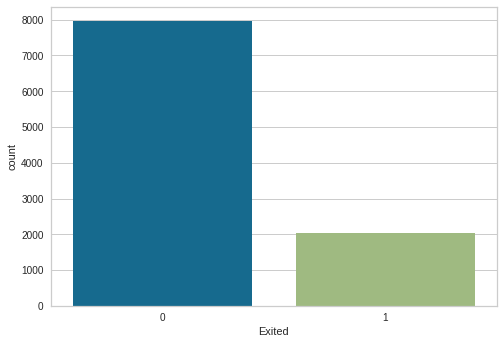

In [ ]:
sns.countplot(data['Exited'])

## 9. Encoding Categorical Data

In [ ]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
data = pd.get_dummies(data,drop_first=True)

In [ ]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [ ]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [ ]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

## 10. Join the data together

In [ ]:
X_res['Exited'] = y_res

In [ ]:
X_res

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,619,42,2,0.000000,1,1,1,101348.880000,0,0,0,1
1,608,41,1,83807.860000,1,0,1,112542.580000,0,1,0,0
2,502,42,8,159660.800000,3,1,0,113931.570000,0,0,0,1
3,699,39,1,0.000000,2,0,0,93826.630000,0,0,0,0
4,850,43,2,125510.820000,1,1,1,79084.100000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15921,628,36,4,107614.323028,1,0,0,69553.159486,1,0,0,1
15922,681,42,5,0.000000,1,1,1,23228.776297,0,0,0,1
15923,671,43,3,149510.667350,1,1,0,189295.119916,1,0,0,1
15924,683,45,9,199384.487667,1,1,0,189379.067061,0,0,0,1


In [ ]:
X_res.shape

(15926, 12)

## 11. Train the model

In [ ]:
from pycaret.classification import *
s = setup(data = X_res, target='Exited', train_size=0.8 )

,Description,Value
0,session_id,3458
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15926, 12)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Exited',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

## 12. Compare the models

In [ ]:
s = setup(data = X_res, target='Exited')
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8449,0.9209,0.8381,0.8485,0.8432,0.6898,0.6900,1.229
lightgbm,Light Gradient Boosting Machine,0.8446,0.9226,0.8375,0.8484,0.8429,0.6892,0.6894,0.185
gbc,Gradient Boosting Classifier,0.8309,0.9120,0.8182,0.8383,0.8280,0.6618,0.6622,1.322
et,Extra Trees Classifier,0.8272,0.9086,0.8278,0.8256,0.8266,0.6545,0.6546,0.778
ada,Ada Boost Classifier,0.8165,0.8982,0.8211,0.8123,0.8165,0.6329,0.6332,0.304
ridge,Ridge Classifier,0.8033,0.0000,0.8148,0.7952,0.8048,0.6066,0.6069,0.017
lda,Linear Discriminant Analysis,0.8032,0.8849,0.8148,0.7951,0.8047,0.6064,0.6067,0.081
dt,Decision Tree Classifier,0.7776,0.7777,0.7942,0.7672,0.7804,0.5553,0.5558,0.051
nb,Naive Bayes,0.7200,0.7899,0.7560,0.7036,0.7287,0.4403,0.4417,0.017
knn,K Neighbors Classifier,0.6714,0.7241,0.7430,0.6482,0.6923,0.3433,0.3471,0.137


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6052, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


## 13. Create the model

In [ ]:
balanced_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8511,0.9220,0.8574,0.8452,0.8513,0.7023,0.7023
1,0.8395,0.9237,0.8412,0.8366,0.8389,0.6789,0.6789
2,0.8520,0.9268,0.8285,0.8677,0.8476,0.7039,0.7047
3,0.8493,0.9236,0.8414,0.8537,0.8475,0.6986,0.6987
4,0.8430,0.9238,0.8306,0.8506,0.8405,0.6861,0.6862
5,0.8404,0.9169,0.8288,0.8471,0.8379,0.6807,0.6808
6,0.8601,0.9214,0.8505,0.8661,0.8582,0.7202,0.7203
7,0.8287,0.9093,0.8360,0.8227,0.8293,0.6574,0.6575
8,0.8510,0.9234,0.8357,0.8606,0.8480,0.7019,0.7022


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6052, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


## 14. Save the new model 

In [ ]:
saved_balanced_model = save_model(balanced_model,"saved_balanced_model_rf")

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6052, verbose=0,
                       warm_start=False), model_name=saved_balanced_model_rf, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                  

Transformation Pipeline and Model Successfully Saved


## 15. Load the new model

In [ ]:
bal_model = load_model('saved_balanced_model_rf')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=/content/saved_balanced_model_rf, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


## 16. Create a new user

In [ ]:
X_res.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male', 'Exited'],
      dtype='object')

In [ ]:
data_test = {'CreditScore' : 512,
        'Age': 34,
        'Tenure': 1,
        'Balance': 5333.00,
        'NumOfProducts': 1,
        'HasCrCard': 1,
        'IsActiveMember': 1,
        'EstimatedSalary': 65999.00,
        'Geography_Germany': 0,
        'Geography_Spain':0,
        'Gender_Male': 1
        }
new_user_2 = pd.DataFrame(data_test, index=[0])
new_user_2

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,512,34,1,5333.0,1,1,1,65999.0,0,0,1


## 17. Predict on the new model

In [ ]:
bal_pred = predict_model(bal_model, new_user_2)
bal_pred

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Exited',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_featur

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Label,Score
0,512,34,1,5333.0,1,1,1,65999.0,0,0,1,0,0.77


The new model predicts the user would stay but with a lower chance of certainty.